In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#loads the mnist dataset and splits into different training sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#flattens 28 by 28 images into 2d array of pixels  
x_train_flatten = (x_train.reshape(x_train.shape[0], -1) / 255.0).T
x_test_flatten = (x_test.reshape(x_test.shape[0], -1) / 255.0).T

In [2]:
x_train_flatten.shape, y_train.shape, x_test_flatten.shape, y_test.shape

((784, 60000), (60000,), (784, 10000), (10000,))

In [3]:

input_layer = 784
hidden_layer = 128
output_layer = 10
mini_batch_size = 10
epochs = 100
learning_rate = 3

_, m = x_train_flatten.shape


#initialize weights and biases before training using Xavier/Glorot initialization
np.random.seed(0)
W1 = np.random.randn(hidden_layer, input_layer) * np.sqrt(1 / input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(output_layer, hidden_layer) * np.sqrt(1 / hidden_layer)
b2 = np.zeros((output_layer, 1))

In [4]:
#all functions that are used in stochastic gradient descent

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def evaluate_network(x, W1, b1, W2, b2, Y):
    _, _, _, a2 = feed_forward(x, W1, b1, W2, b2)
    predictions = np.argmax(a2, 0)
    return f'{np.sum(predictions == Y)}/{Y.size}', (np.sum(predictions == Y) / Y.size) * 100, predictions

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

#returns weighted inputs and activation layers after simple feed forward algorithm
def feed_forward(x, W1, b1, W2, b2):
    z1 = np.dot(W1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

#returns changes to weights and biases based on categorial cross-entropy loss algorithm
def back_prop(W1, b1, W2, b2, z1, a1, z2, a2, m, Y, x):
    one_hot_Y = one_hot(Y)
    dZ2 = a2 - one_hot_Y
    dW2 = 1 / m * np.dot(dZ2, a1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = np.dot(W2.T, dZ2) * relu_prime(z1)
    dW1 = 1 / m * np.dot(dZ1, x.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def change_params(learning_rate, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2
    

In [5]:
#stochastic gradient-descent algorithm
for k in range(epochs):
    for i in range(0, m, mini_batch_size):
        current_mini_batch_y = y_train[i:i+mini_batch_size]
        current_mini_batch_x = x_train_flatten[:, i:i+mini_batch_size]
        z1, a1, z2, a2 = feed_forward(current_mini_batch_x, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(W1, b1, W2, b2, z1, a1, z2, a2, m, current_mini_batch_y, current_mini_batch_x)
        W1, b1, W2, b2 = change_params(learning_rate, W1, b1, W2, b2, dW1, db1, dW2, db2)
    if k == 0 or (k + 1) % 10 == 0:
        evaluation, percentage, _ = evaluate_network(x_train_flatten, W1, b1, W2, b2, y_train)
        print(f'epoch number {k+1}: {evaluation} or {percentage:.2f}%')

epoch number 1: 48040/60000 or 80.07%
epoch number 10: 54142/60000 or 90.24%
epoch number 20: 54965/60000 or 91.61%
epoch number 30: 55526/60000 or 92.54%
epoch number 40: 55982/60000 or 93.30%
epoch number 50: 56362/60000 or 93.94%
epoch number 60: 56687/60000 or 94.48%
epoch number 70: 56958/60000 or 94.93%
epoch number 80: 57208/60000 or 95.35%
epoch number 90: 57420/60000 or 95.70%
epoch number 100: 57596/60000 or 95.99%


In [6]:
evaluation, percentage, predictions = evaluate_network(x_test_flatten, W1, b1, W2, b2, y_test)
print(f'test data evaluation: {evaluation} or {percentage:.2f}%')

test data evaluation: 9559/10000 or 95.59%


In [7]:
def display_predictions(predictions, y_test, data_point):
    plt.imshow(x_test[data_point], cmap = plt.cm.binary)
    print(f'prediction: {predictions[data_point]}')
    print(f'label: {y_test[data_point]}')
    plt.show()

prediction: 7
label: 7


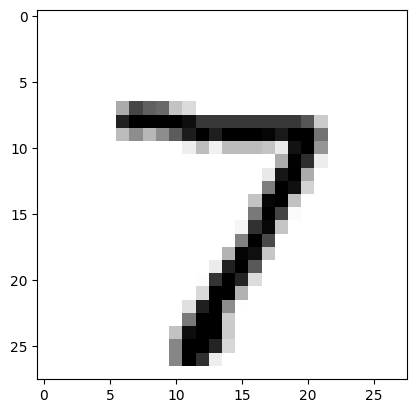

prediction: 2
label: 2


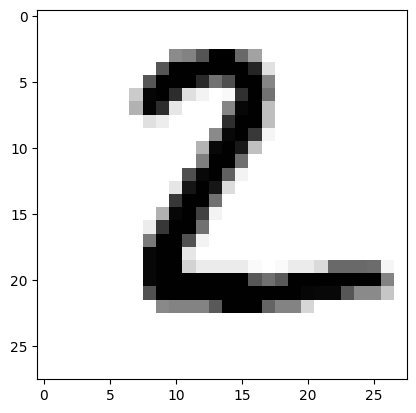

prediction: 1
label: 1


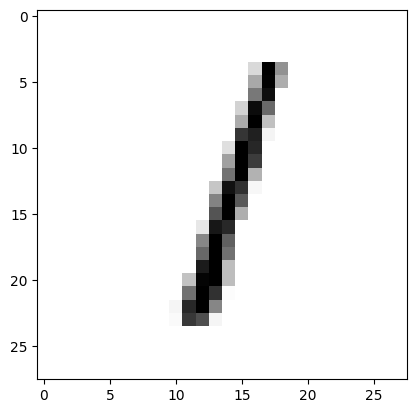

prediction: 0
label: 0


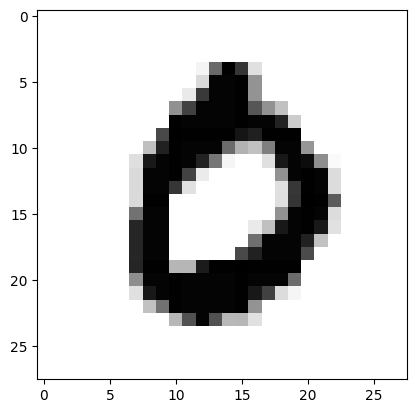

In [8]:
for i in range(4):
    display_predictions(predictions, y_test, i)
